Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Importing Data

In [3]:
df=pd.read_csv('top250_anime.csv')

Checking out the Data

In [4]:
df.head(5)

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        250 non-null    int64  
 1   Title       250 non-null    object 
 2   Popularity  250 non-null    int64  
 3   Genre       249 non-null    object 
 4   Studio      248 non-null    object 
 5   Type        250 non-null    object 
 6   Episodes    249 non-null    float64
 7   Duration    250 non-null    int64  
 8   Start_date  250 non-null    object 
 9   End_date    248 non-null    object 
 10  Members     248 non-null    float64
 11  Score       250 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 23.6+ KB


In [6]:
df.describe()

,Rank,Popularity,Episodes,Duration,Members,Score
count,250.000000,250.000000,249.000000,250.000000,2.480000e+02,250.000000
mean,125.500000,855.460000,17.791165,41.720000,6.642592e+05,8.546680
std,72.312977,1009.330929,23.988668,35.677178,6.847809e+05,0.206665
min,1.000000,1.000000,1.000000,3.000000,1.056600e+04,8.290000
25%,63.250000,178.250000,1.000000,23.000000,1.899975e+05,8.380000
50%,125.500000,490.000000,12.000000,24.000000,4.154550e+05,8.505000
75%,187.750000,1139.000000,24.000000,29.000000,8.616745e+05,8.660000
max,250.000000,5794.000000,201.000000,161.000000,3.673536e+06,9.170000


Data Cleaning

In [7]:
#Checking for null values
df.isnull().sum()

Rank          0
Title         0
Popularity    0
Genre         1
Studio        2
Type          0
Episodes      1
Duration      0
Start_date    0
End_date      2
Members       2
Score         0
dtype: int64

In [8]:
#dropping all rows  with null values
df=df.dropna()
df.isnull().sum()

Rank          0
Title         0
Popularity    0
Genre         0
Studio        0
Type          0
Episodes      0
Duration      0
Start_date    0
End_date      0
Members       0
Score         0
dtype: int64

In [9]:
#checking for duplicate values
df.duplicated().sum()

0

In [10]:
df=df.drop(['Start_date','End_date','Episodes','Duration','Studio'],axis=1)
df

,Rank,Title,Popularity,Genre,Type,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",Special,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",TV,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",TV,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",TV,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",TV,581994.0,9.07
...,...,...,...,...,...,...,...
245,246,Blue Lock,439,Sports,TV,459426.0,8.30
246,247,Detective Conan Movie 06: The Phantom of Baker...,2289,"Adventure, Mystery",Movie,73487.0,8.30
247,248,Diamond no Ace: Second Season,1541,Sports,TV,130376.0,8.30
248,249,Hibike! Euphonium 2,1017,Drama,TV,213707.0,8.30


EDA

Which are the top 10 anime by Score?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Shingeki no Kyojin: The Final Season - Kanketsu-hen'),
  Text(1, 0, 'Fullmetal Alchemist: Brotherhood'),
  Text(2, 0, 'Bleach: Sennen Kessen-hen'),
  Text(3, 0, 'Steins;Gate'),
  Text(4, 0, 'Gintama°'),
  Text(5, 0, 'Kaguya-sama wa Kokurasetai: Ultra Romantic'),
  Text(6, 0, 'Shingeki no Kyojin Season 3 Part 2'),
  Text(7, 0, 'Gintama: The Final'),
  Text(8, 0, "Gintama'"),
  Text(9, 0, 'Hunter x Hunter (2011)')])

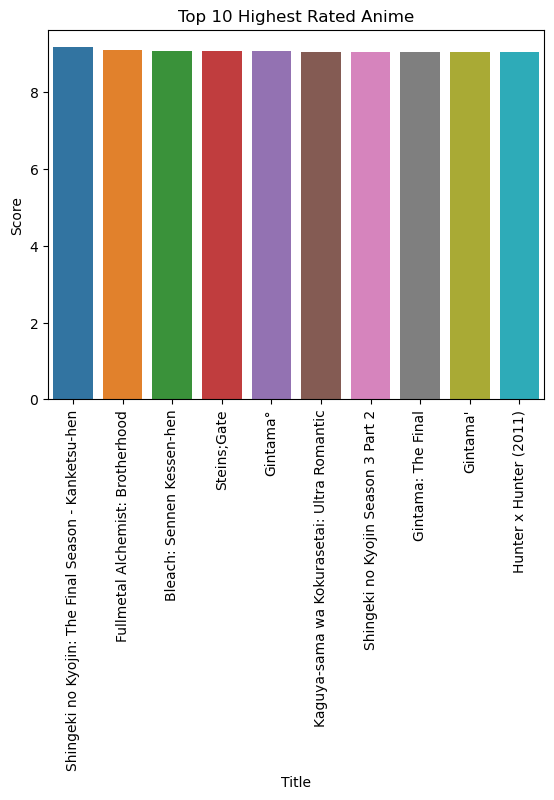

In [11]:
topt=df.sort_values('Score',ascending=False).head(10)
sn.barplot(data=topt,x='Title',y= 'Score')
plt.title("Top 10 Highest Rated Anime")
plt.xticks(rotation=90)

As you can see the top 10 have a score close to 10 with Attack on titan on top.

Which are the most popular anime.?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IDOLiSH7 Third Beat! Part 2'),
  Text(1, 0, 'Shoujo☆Kageki Revue Starlight Movie'),
  Text(2, 0, 'The First Slam Dunk'),
  Text(3, 0, 'Road of Naruto'),
  Text(4, 0, 'Tian Guan Ci Fu Special'),
  Text(5, 0, 'Gintama: Yorinuki Gintama-san on Theater 2D'),
  Text(6, 0, 'Natsume Yuujinchou Go Specials'),
  Text(7, 0, 'Natsume Yuujinchou Roku Specials'),
  Text(8, 0, 'Ashita no Joe 2'),
  Text(9, 0, 'Romeo no Aoi Sora')])

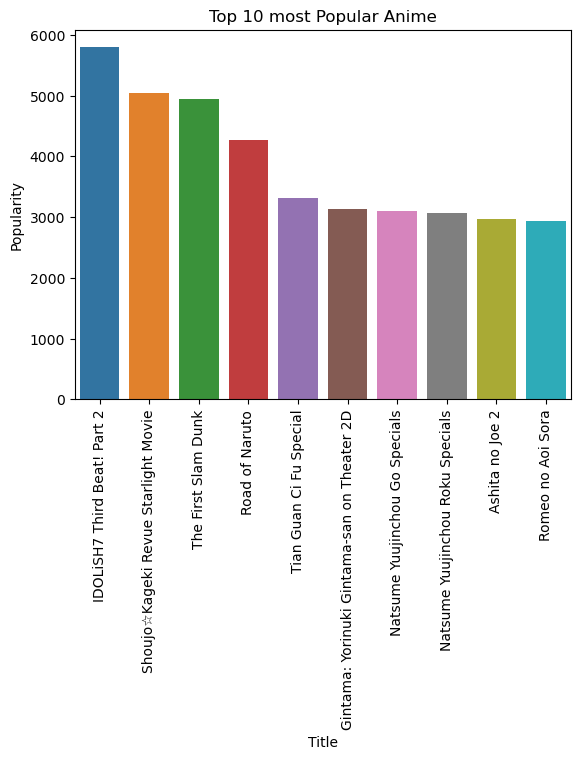

In [12]:
topp=df.sort_values('Popularity',ascending=False).head(10)
sn.barplot(data=topp,x='Title',y= 'Popularity')
plt.title("Top 10 most Popular Anime")
plt.xticks(rotation=90)

There are animes titles that are not much heard of but still are popular with the rating less than 9

WHich are the most viewed anime?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Shingeki no Kyojin'),
  Text(1, 0, 'Death Note'),
  Text(2, 0, 'Fullmetal Alchemist: Brotherhood'),
  Text(3, 0, 'One Punch Man'),
  Text(4, 0, 'Kimetsu no Yaiba'),
  Text(5, 0, 'Hunter x Hunter (2011)'),
  Text(6, 0, 'Kimi no Na wa.'),
  Text(7, 0, 'Shingeki no Kyojin Season 2'),
  Text(8, 0, 'Steins;Gate'),
  Text(9, 0, 'Jujutsu Kaisen')])

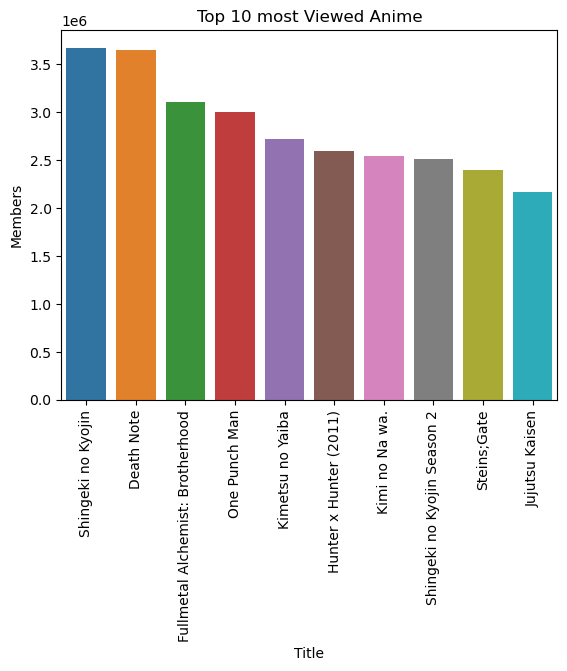

In [13]:
topp=df.sort_values('Members',ascending=False).head(10)
sn.barplot(data=topp,x='Title',y= 'Members')
plt.title("Top 10 most Viewed Anime")
plt.xticks(rotation=90)

Which are the top 10 highest rated genres.

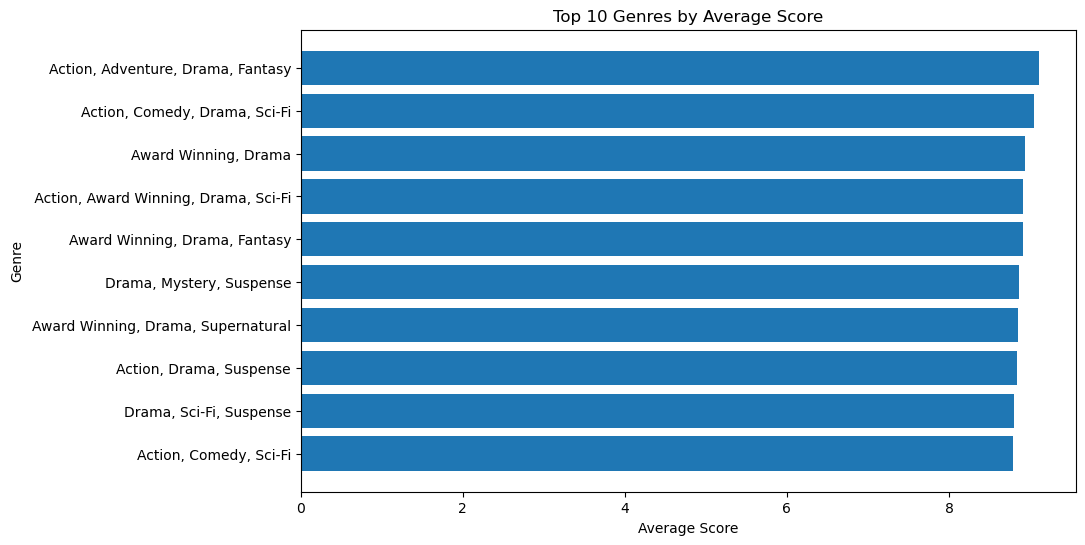

In [14]:
# Calculate the average score for each genre
average_scores = df.groupby('Genre')['Score'].mean().nlargest(10)

# Plot the top 10 genres by average score
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
plt.barh(average_scores.index, average_scores.values)  # Use horizontal bar chart for better readability
plt.xlabel('Average Score')  # Add a label for the x-axis
plt.ylabel('Genre')  # Add a label for the y-axis
plt.title('Top 10 Genres by Average Score')  # Use a more descriptive title
plt.gca().invert_yaxis()  # Invert the y-axis to match the order of the data
plt.show()

<li>
The combination of Action, Comedy, and Sci-Fi genres appears to be the most popular, achieving the highest average score.</li>
<li>There is a trend where genres associated with Action tend to have higher average scores, especially when combined with Adventure, Fantasy, Comedy, and Sci-Fi.</li>
<li>The presence of ‘Award Winning’ in several genre combinations suggests that these genres are often linked to critically acclaimed content.</li>

Which are the most popular genres?

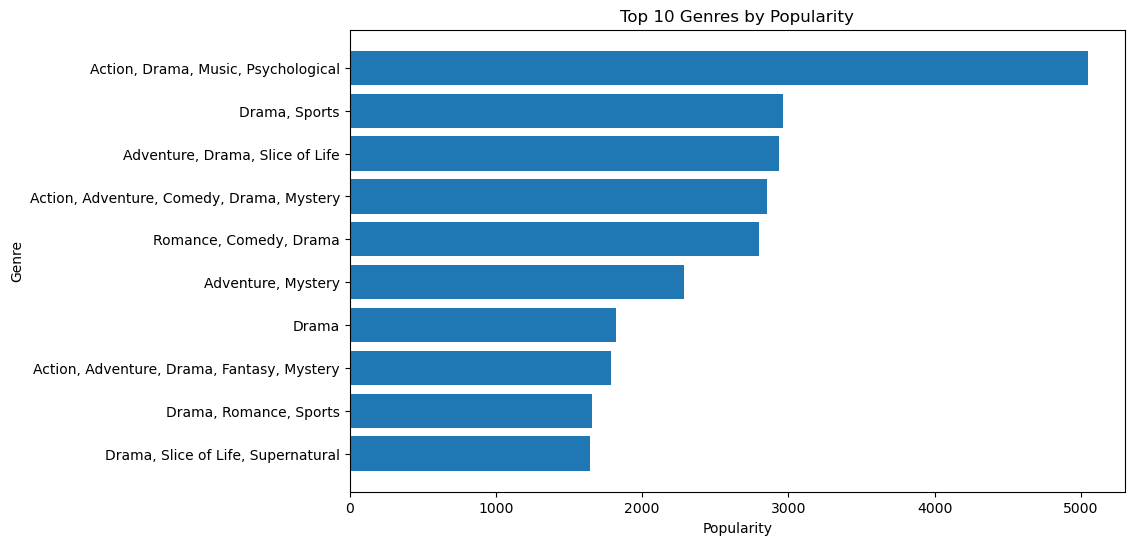

In [15]:
# Calculate the average Popularity for each genre
average_popular = df.groupby('Genre')['Popularity'].mean().nlargest(10)

# Plot the top 10 genres by average Popularity
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
plt.barh(average_popular.index, average_popular.values)  # Use horizontal bar chart for better readability
plt.xlabel('Popularity')  # Add a label for the x-axis
plt.ylabel('Genre')  # Add a label for the y-axis
plt.title('Top 10 Genres by Popularity')  # Use a more descriptive title
plt.gca().invert_yaxis()  # Invert the y-axis to match the order of the data
plt.show()

 <li>Genres involving “Action” and “Drama” are particularly popular, often combined with other genres like “Music” and “Psychological.”</li>
 <li>The combination of “Action Adventure Comedy Drama Mystery Shounen” suggests a high popularity for mixed-genre series.</li>
 <li>More specialized genres like “Drama Sports” and “Drama Romance School Supernatural” also have a significant following</li>

Which are the Most Viewed Genres?

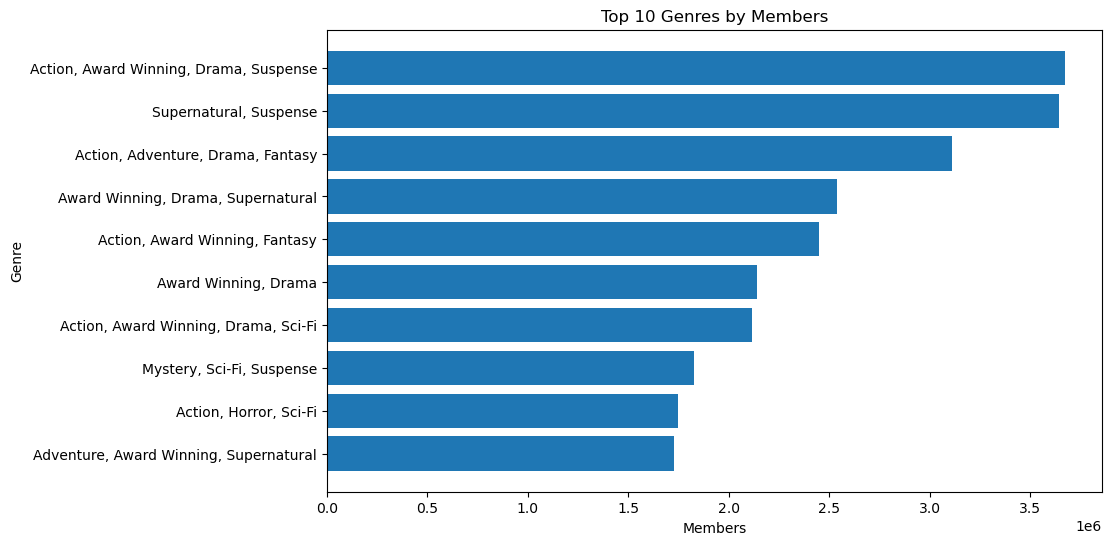

In [16]:
# Calculate the average viewers for each genre
average_viewers = df.groupby('Genre')['Members'].mean().nlargest(10)

# Plot the top 10 genres by average viewers
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
plt.barh(average_viewers.index, average_viewers.values)  # Use horizontal bar chart for better readability
plt.xlabel('Members')  # Add a label for the x-axis
plt.ylabel('Genre')  # Add a label for the y-axis
plt.title('Top 10 Genres by Members')  # Use a more descriptive title
plt.gca().invert_yaxis()  # Invert the y-axis to match the order of the data
plt.show()

 Genres combining Action with Adventure, Drama, Horror, Sci-Fi, and Award Winning elements are highly popular among members, with Action, Adventure being the most favored.

What is Average Score For each type?

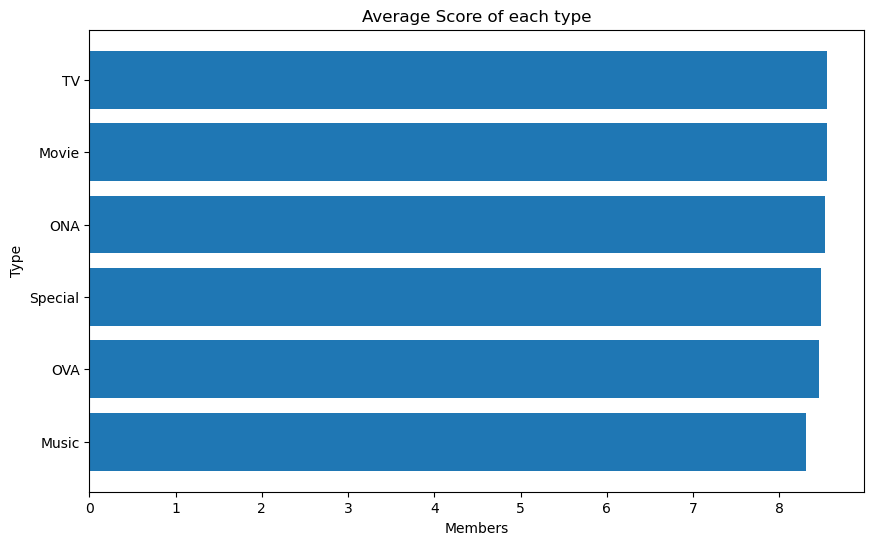

In [17]:
df.head()# Calculate the average viewers for each genre
average_typev = df.groupby('Type')['Score'].mean().nlargest(10)
# Plot the content type by average Viewers
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
plt.barh(average_typev.index, average_typev.values)  # Use horizontal bar chart for better readability
plt.xlabel('Members')  # Add a label for the x-axis
plt.ylabel('Type')  # Add a label for the y-axis
plt.title('Average Score of each type')  # Use a more descriptive title
plt.gca().invert_yaxis()  # Invert the y-axis to match the order of the data
plt.show()

TV Movies and ONA, are highest rated content types.

What type of content is most popular?

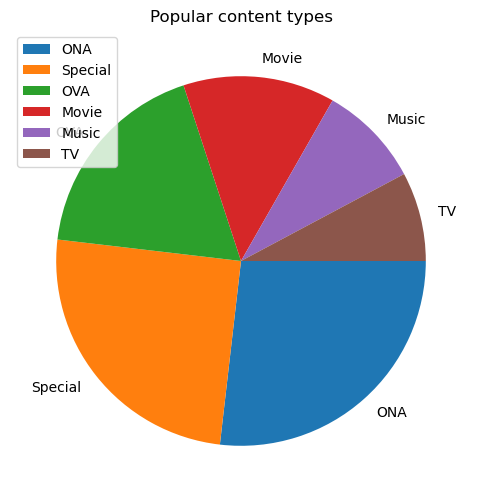

In [18]:
# Calculate the average popularity for each type
average_type = df.groupby('Type')['Popularity'].mean().nlargest(10)
average_type
# Plot the content type by average popularity
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
plt.pie(labels=average_type.index, x=average_type.values)  # Use Pie chart for better readability
plt.title('Popular content types')  # Use a more descriptive title
plt.gca().invert_yaxis()  # Invert the y-axis to match the order of the data
plt.legend()
plt.show()

ONA,s are more popular among Audiences Followed by tv specials and OVA,s

What Content Type is most viewed?

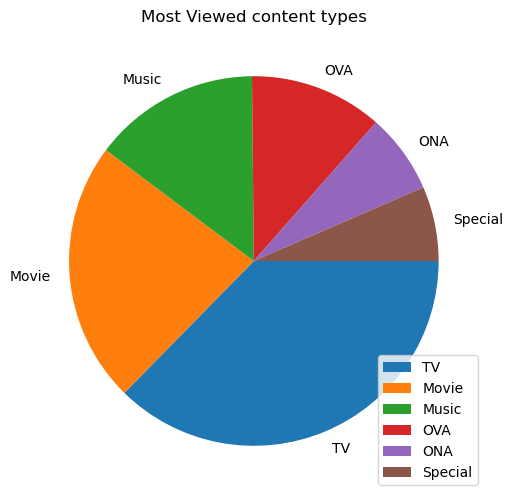

In [19]:
# Calculate the average viewers for each genre
average_typev = df.groupby('Type')['Members'].mean().nlargest(10)
# Plot the content type by average Viewers
plt.figure(figsize=(10, 6))  # Set a reasonable figure size
plt.pie(labels=average_typev.index, x=average_typev.values)  # Use pie chart for better readability
plt.title('Most Viewed content types')  # Use a more descriptive title
plt.gca().invert_yaxis()  # Invert the y-axis to match the order of the data
plt.legend()
plt.show()

TV anime have most viewership followed by Movies and Music Anime with Anime specials being the least viewed.